auth success 
已退出


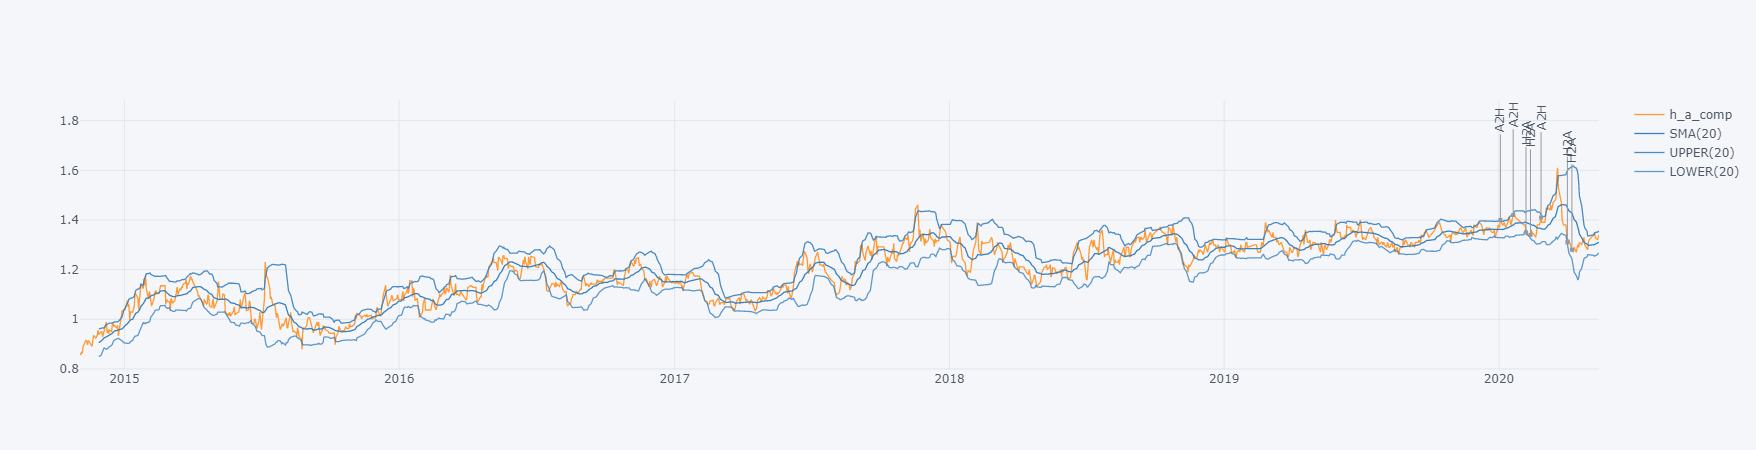

In [1]:
from jqdatasdk import *
import pandas as pd
import cufflinks as cf

# 从 JoinQuant 获取 AH 溢价数据
def get_data(code):

    auth('18986290611', 'Wenbl0821')
    ncode = normalize_code(code)
    
    stk= finance.STK_AH_PRICE_COMP
    q = query(stk).filter(stk.a_code == ncode).order_by(stk.day)
    df = finance.run_query(q)
    logout()
    df['day'] = pd.to_datetime(df['day'])
    df.set_index('day', inplace=True)
    dfcomp = df['h_a_comp']
    dfcomp.ffill(inplace=True)
    return dfcomp

# df = pd.read_excel("./ah_pair_trading.xls", parse_dates=['day'], index_col='day')
annotations = {
    '2020-01-03': 'A2H', 
    '2020-01-20': 'A2H', 
    '2020-02-06': 'H2A', 
    '2020-02-12': 'H2A', 
    '2020-02-26': 'A2H',
    '2020-04-01': 'H2A',
    '2020-04-07': 'H2A'
    }
# 使用20日移动算术平均作为中轴，2倍标准差作为上下限
def plot_ah_comp(code, annotations=None):
    df = get_data(code)
    df.ta_plot(study='boll', periods=20, annotations=annotations, title=code)
    
plot_ah_comp('601601', annotations=annotations)

auth success 
已退出


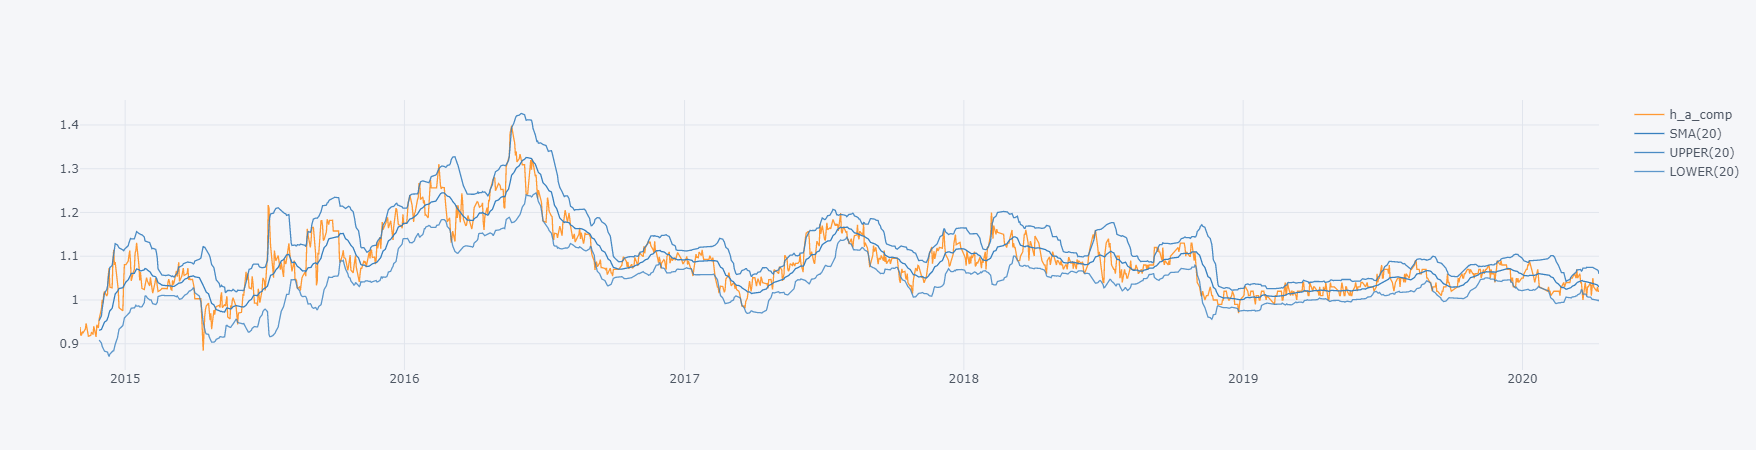

In [7]:
plot_ah_comp('600036')